### Testing and Evaluation on Collaborative Filtering with User Rating Preference Clustering

In [2]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import functions
import Metrics
import CF
import CF_clust1

In [3]:
# reads in the 100k user rating data set
u100k = pd.read_csv('u.data', sep='\t', names=['userID', 'filmID', 'rating', 'timestamp'])

# reads in the 1m user rating data set
u1m = pd.read_csv('ratings.dat', sep='::', names=['userID', 'filmID', 'rating', 'timestamp'], engine ='python')

In [12]:
# generate a user-item and similarity matrix on the full data set
UI_full = CF.gen_ui_matrix(u100k, u100k)
user_sim = Metrics.gen_cos(UI_full, True)

In [13]:
# create the rating preference clusters
c_n = np.sum(UI_full, axis=0)/(np.count_nonzero(UI_full, axis=0)+1e-9)
onp_cluster = CF_clust1.user_cluster(UI_full, Metrics.gen_cos(np.vstack([UI_full, c_n]),True))
cluster_ind = [np.where(onp_cluster==i)[0] for i in range(3)]
sim_cluster_ind = np.concatenate([c for c in cluster_ind])

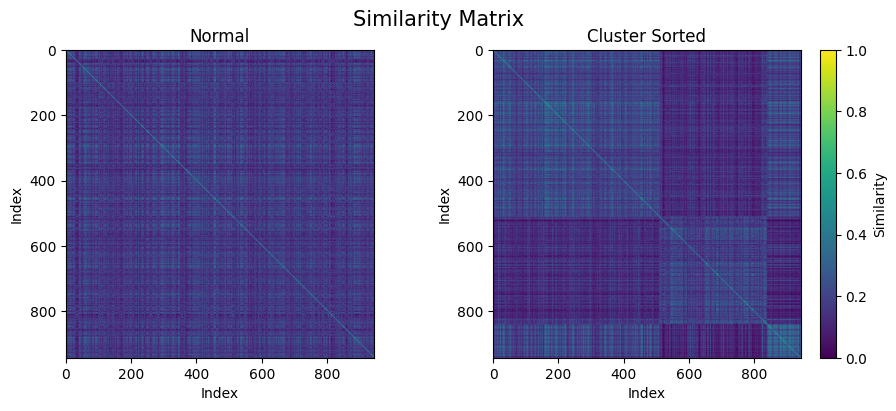

In [14]:
# plot heatmaps of the similarity matrix sorted by clusters
plt.figure(figsize=(11,4))
plt.suptitle("Similarity Matrix", size=15)

plt.subplot(1, 2, 1)
plt.imshow(user_sim)
plt.title('Normal')
plt.xlabel('Index')
plt.ylabel('Index')

plt.subplot(1, 2, 2)
plt.imshow(user_sim[np.ix_(sim_cluster_ind, sim_cluster_ind)])
plt.title('Cluster Sorted')
plt.xlabel('Index')
plt.ylabel('Index')
plt.colorbar(label='Similarity')

In [4]:
k_range = np.arange(10,301,10)

In [5]:
cluster_cos_eval_test = CF_clust1.cluster_cross_val(u100k, 10, Metrics.gen_cos, k_range)
cluster_pcc_eval_test = CF_clust1.cluster_cross_val(u100k, 10, Metrics.gen_pcc, k_range)
cluster_srcc_eval_test = CF_clust1.cluster_cross_val(u100k, 10, Metrics.gen_srcc, k_range)
cluster_jacc_eval_test = CF_clust1.cluster_cross_val(u100k, 10, Metrics.gen_jacc_tree, k_range)
cluster_euc_eval_test = CF_clust1.cluster_cross_val(u100k, 10, Metrics.gen_euc, k_range)
cluster_mhat_eval_test = CF_clust1.cluster_cross_val(u100k, 10, Metrics.gen_mhat, k_range)
cluster_cheb_eval_test = CF_clust1.cluster_cross_val(u100k, 10, Metrics.gen_cheb_tree, k_range)

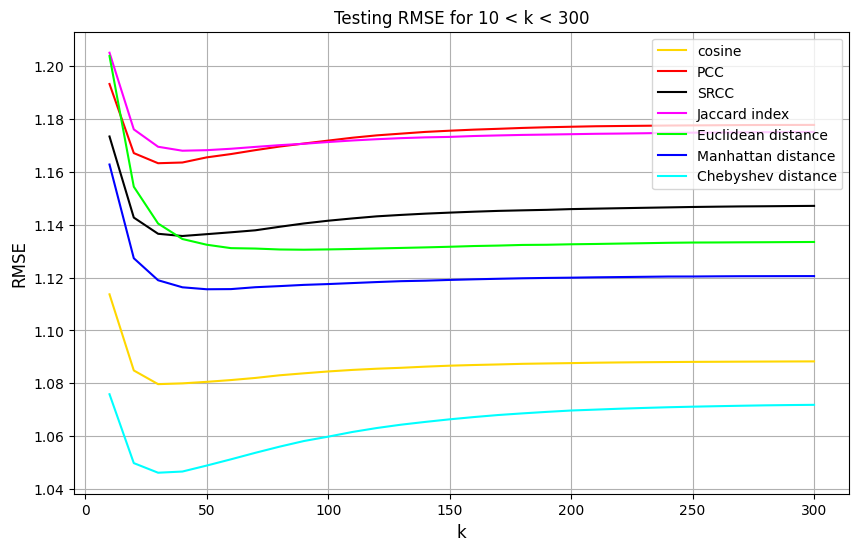

In [6]:
plt.figure(figsize=(10,6))
plt.title("Testing RMSE for 10 < k < 300", size=12)
plt.plot(k_range, cluster_cos_eval_test[0], label = 'cosine', color='gold')
plt.plot(k_range, cluster_pcc_eval_test[0], label = 'PCC', color='red')
plt.plot(k_range, cluster_srcc_eval_test[0], label = 'SRCC', color='black')
plt.plot(k_range, cluster_jacc_eval_test[0], label = 'Jaccard index', color='magenta')
plt.plot(k_range, cluster_euc_eval_test[0], label = 'Euclidean distance', color='lime')
plt.plot(k_range, cluster_mhat_eval_test[0], label = 'Manhattan distance', color='blue')
plt.plot(k_range, cluster_cheb_eval_test[0], label = 'Chebyshev distance', color='aqua')
plt.grid()
plt.legend(loc = 'upper right')
plt.ylabel('RMSE', size=12)
plt.xlabel('k', size=12)
plt.show()

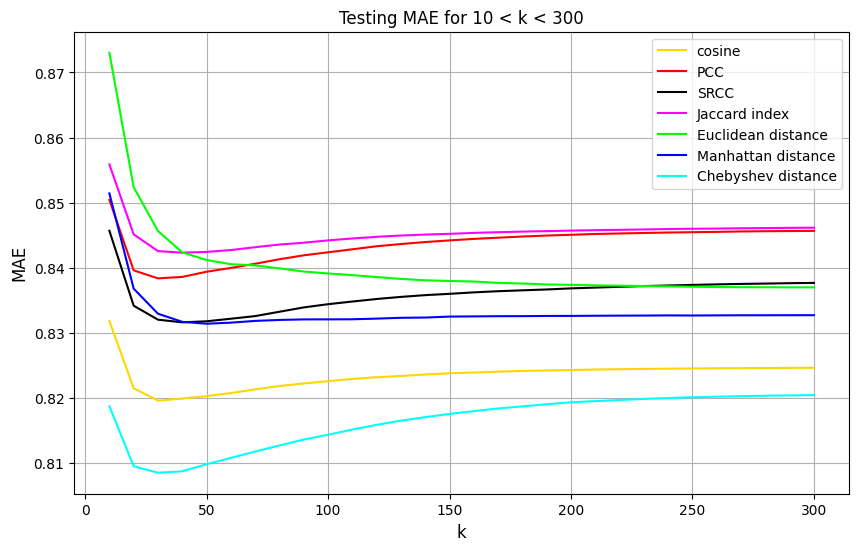

In [7]:
plt.figure(figsize=(10,6))
plt.title("Testing MAE for 10 < k < 300", size=12)
plt.plot(k_range, cluster_cos_eval_test[1], label = 'cosine', color='gold')
plt.plot(k_range, cluster_pcc_eval_test[1], label = 'PCC', color='red')
plt.plot(k_range, cluster_srcc_eval_test[1], label = 'SRCC', color='black')
plt.plot(k_range, cluster_jacc_eval_test[1], label = 'Jaccard index', color='magenta')
plt.plot(k_range, cluster_euc_eval_test[1], label = 'Euclidean distance', color='lime')
plt.plot(k_range, cluster_mhat_eval_test[1], label = 'Manhattan distance', color='blue')
plt.plot(k_range, cluster_cheb_eval_test[1], label = 'Chebyshev distance', color='aqua')
plt.grid()
plt.legend(loc = 'upper right')
plt.ylabel('MAE', size=12)
plt.xlabel('k', size=12)
plt.show()

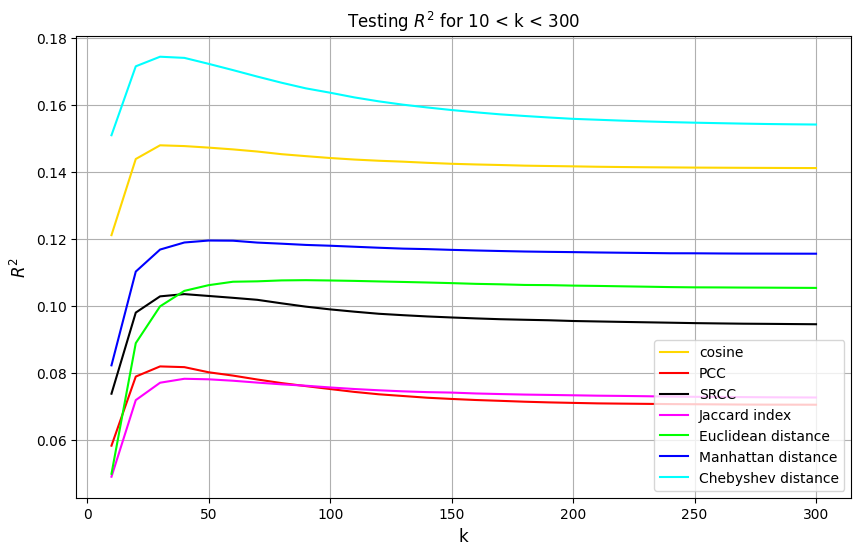

In [8]:
plt.figure(figsize=(10,6))
plt.title(r"Testing $R^2$ for 10 < k < 300", size=12)
plt.plot(k_range, cluster_cos_eval_test[2], label = 'cosine', color='gold')
plt.plot(k_range, cluster_pcc_eval_test[2], label = 'PCC', color='red')
plt.plot(k_range, cluster_srcc_eval_test[2], label = 'SRCC', color='black')
plt.plot(k_range, cluster_jacc_eval_test[2], label = 'Jaccard index', color='magenta')
plt.plot(k_range, cluster_euc_eval_test[2], label = 'Euclidean distance', color='lime')
plt.plot(k_range, cluster_mhat_eval_test[2], label = 'Manhattan distance', color='blue')
plt.plot(k_range, cluster_cheb_eval_test[2], label = 'Chebyshev distance', color='aqua')
plt.grid()
plt.legend(loc = 'lower right')
plt.ylabel(r'$R^2$', size=12)
plt.xlabel('k', size=12)
plt.show()